In [1]:
import numpy as np # vetores e matrizes
import pandas as pd # pre-processamento 

In [3]:
#lendo o arquivo
df_diabetes=pd.read_csv('pima-indians-diabetes.csv',header=None)

In [4]:
df_diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: >

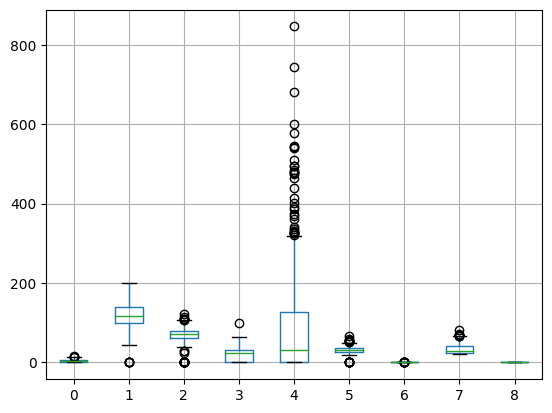

In [5]:
df_diabetes.boxplot()

In [6]:
#verificando a quantidade de instâncias e colunas existentes
df_diabetes.shape

(768, 9)

In [7]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df_diabetes[df_diabetes.iloc[:,8]==1].iloc[:,7].mean()

37.06716417910448

In [9]:
df_diabetes.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df_com_diabetes=df_diabetes[df_diabetes.iloc[:,8]==1]

In [11]:
df_com_diabetes.iloc[:,7].mean()

37.06716417910448

In [12]:
df_sem_diabetes=df_diabetes[df_diabetes.iloc[:,8]==0]

In [13]:
df_sem_diabetes.head()

,0,1,2,3,4,5,6,7,8
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
df_sem_diabetes.iloc[:,0].max()

13

In [14]:
#separando os dados entre entrada e saída 
entrada=df_diabetes.iloc[:,:-1].values
saida=df_diabetes.iloc[:,8].values

In [15]:
entrada[:,1].max()

199.0

In [16]:
#importando o módulo sklearn
from sklearn.preprocessing import MinMaxScaler #biblioteca utilizada para a normalização dos dados


#aplicando a normalização para os dados
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(entrada) #aplica a normalização

In [17]:
entradas_normalizadas[:,1].max()

1.0

In [19]:
#dividindo os dados entre treinamento e teste 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(entradas_normalizadas, saida, test_size=0.30,random_state=42)

In [20]:
#aplicando o KNN
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [21]:
#avalia a acurácia do modelo
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



In [24]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão

# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier(random_state=1)

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



In [26]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

#define a configuração da rede
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1) #rede com escondidas com 5 neurônios cada 

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)

#realiza a previsão
y_pred=clf_mlp.predict(X_test)

c:\Users\Janildo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       151
           1       0.64      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [28]:
melhor_modelo=clf_mlp

**Salvando o Melhor Modelo**

In [29]:
import joblib

#salvando o modelo no disco
nome_do_arquivo = 'melhor_modelo.sav'  #observem a extensão ".sav"
joblib.dump(melhor_modelo, nome_do_arquivo)  # melhor_modelo = modelo com maior acurácia
                                             # nome_do_arquivo = caminho do local onde deve ser salvo o modelo


#carregando o modelo 
modelo_salvo = joblib.load(nome_do_arquivo)  #realiza a carga do modelo salvo
